In [11]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Data Insights

In [12]:
data = pd.read_csv('./Breast_cancer_data.csv')
data[15:25]

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
15,14.540,27.54,96.73,658.8,0.11390,0
16,14.680,20.13,94.74,684.5,0.09867,0
17,16.130,20.68,108.10,798.8,0.11700,0
18,19.810,22.15,130.00,1260.0,0.09831,0
19,13.540,14.36,87.46,566.3,0.09779,1
20,13.080,15.71,85.63,520.0,0.10750,1
21,9.504,12.44,60.34,273.9,0.10240,1
22,15.340,14.26,102.50,704.4,0.10730,0
23,21.160,23.04,137.20,1404.0,0.09428,0
24,16.650,21.38,110.00,904.6,0.11210,0


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   mean_radius      569 non-null    float64
 1   mean_texture     569 non-null    float64
 2   mean_perimeter   569 non-null    float64
 3   mean_area        569 non-null    float64
 4   mean_smoothness  569 non-null    float64
 5   diagnosis        569 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 26.8 KB


In [14]:
data.describe()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,1.000000


In [15]:
data.isnull().sum()

mean_radius        0
mean_texture       0
mean_perimeter     0
mean_area          0
mean_smoothness    0
diagnosis          0
dtype: int64

In [16]:
data.diagnosis.unique()

array([0, 1], dtype=int64)

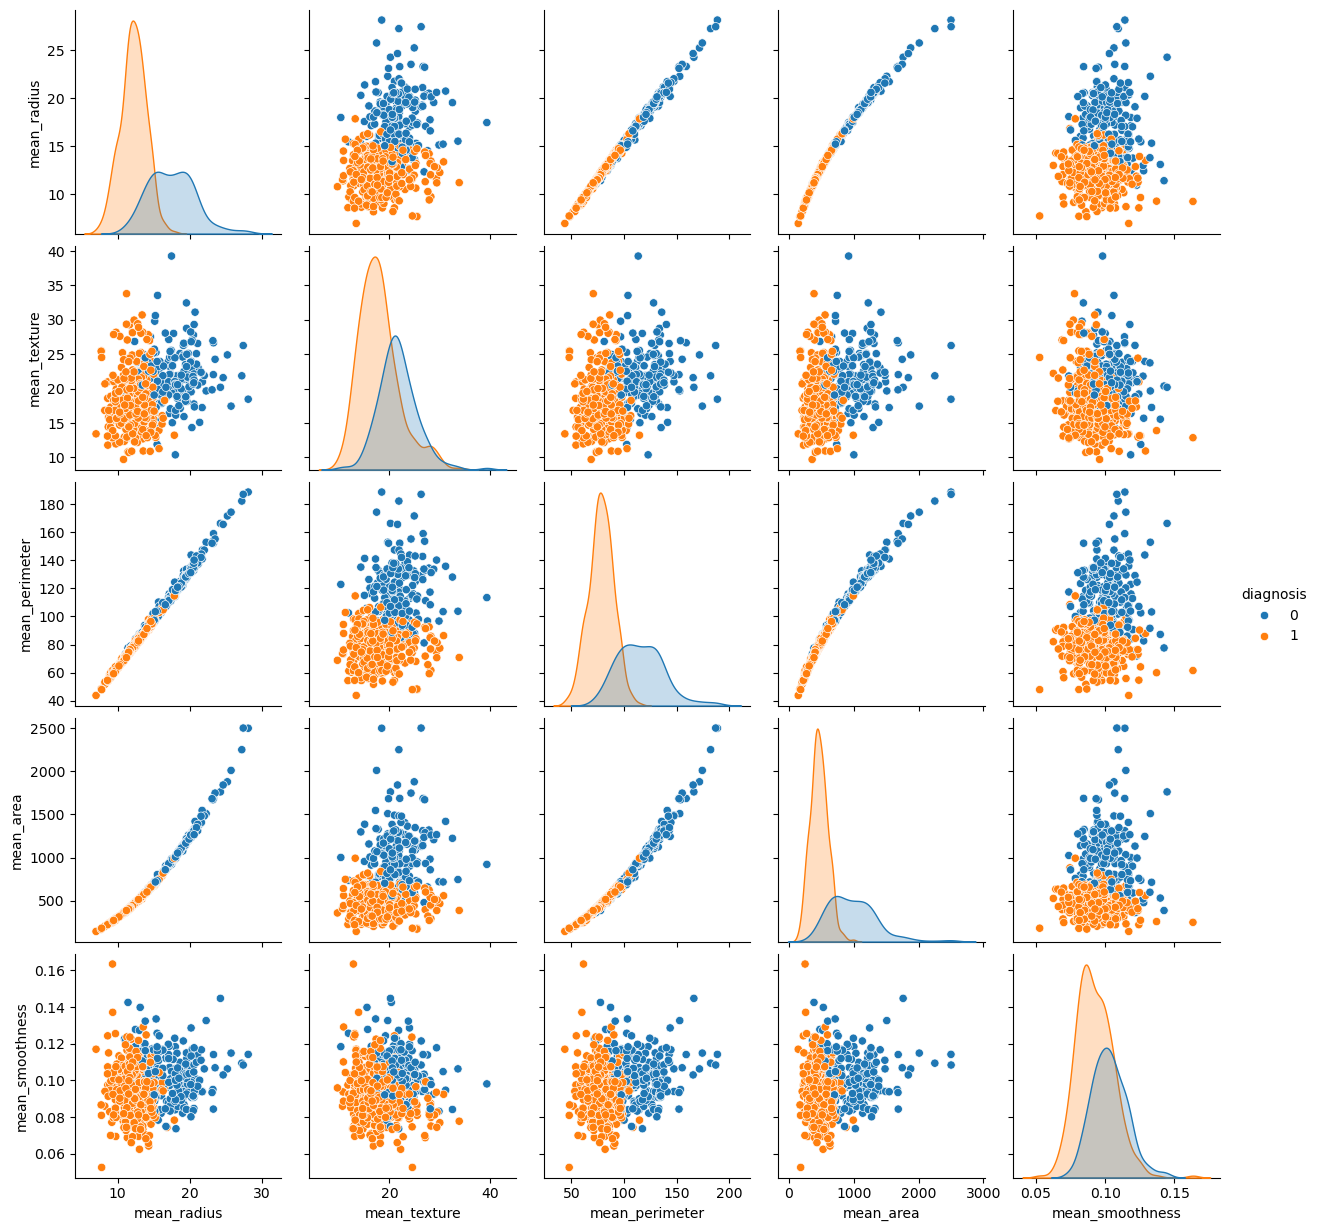

In [10]:
sns.pairplot(data,hue='diagnosis')

<Axes: xlabel='diagnosis'>

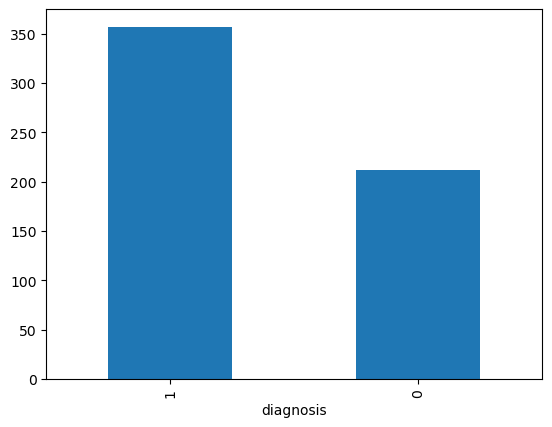

In [17]:
b = data['diagnosis'].value_counts().plot.bar()
b

In [24]:
# one = data[data.diagnosis == 1]
# one.head()

In [18]:
y = data[['diagnosis']] #target variable
y.head()

,diagnosis
0,0
1,0
2,0
3,0
4,0


In [19]:
x = data.iloc[:,0:5] # input variable 
x

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness
0,17.99,10.38,122.80,1001.0,0.11840
1,20.57,17.77,132.90,1326.0,0.08474
2,19.69,21.25,130.00,1203.0,0.10960
3,11.42,20.38,77.58,386.1,0.14250
4,20.29,14.34,135.10,1297.0,0.10030
...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100
565,20.13,28.25,131.20,1261.0,0.09780
566,16.60,28.08,108.30,858.1,0.08455
567,20.60,29.33,140.10,1265.0,0.11780


In [20]:
xx = x.copy() # copy of input variable
xx.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness
0,17.99,10.38,122.80,1001.0,0.11840
1,20.57,17.77,132.90,1326.0,0.08474
2,19.69,21.25,130.00,1203.0,0.10960
3,11.42,20.38,77.58,386.1,0.14250
4,20.29,14.34,135.10,1297.0,0.10030


In [18]:
# cor = x.corr()
# cor

<Axes: >

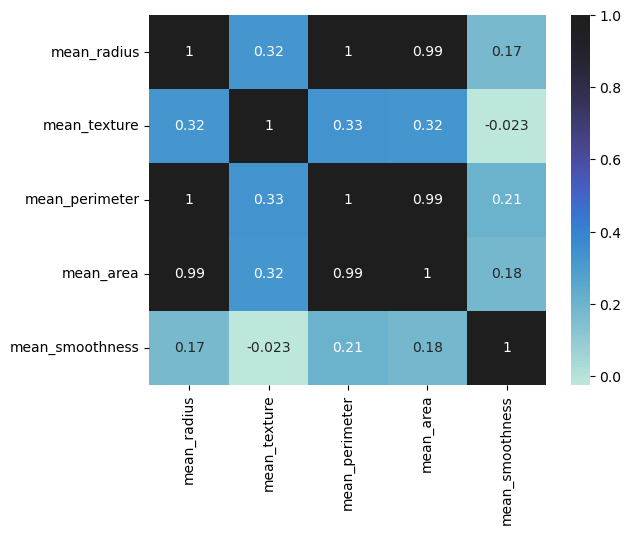

In [21]:
sns.heatmap(x.corr(),annot=True,center = True)

# Before removing outlier

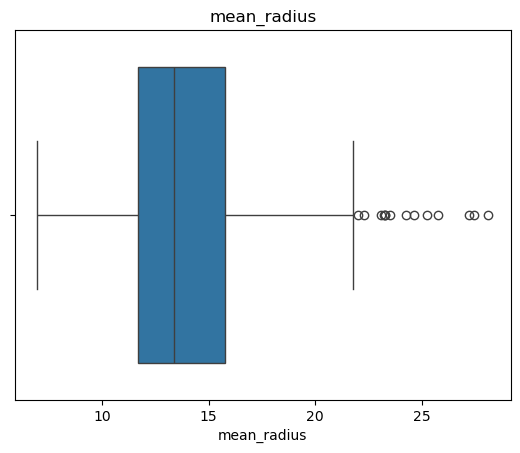

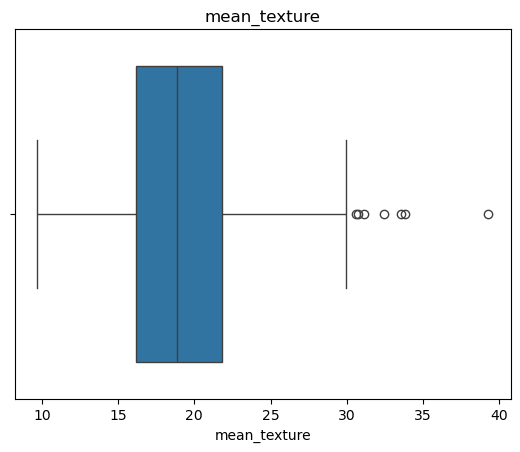

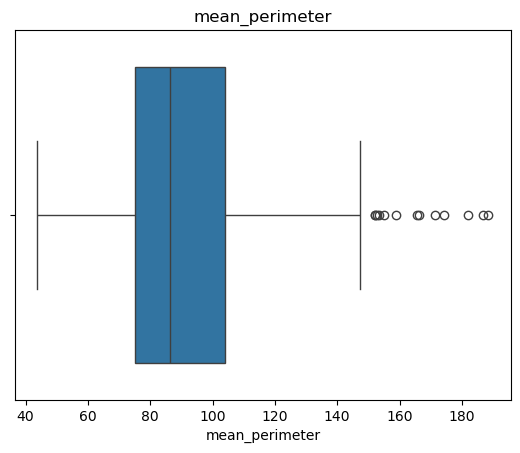

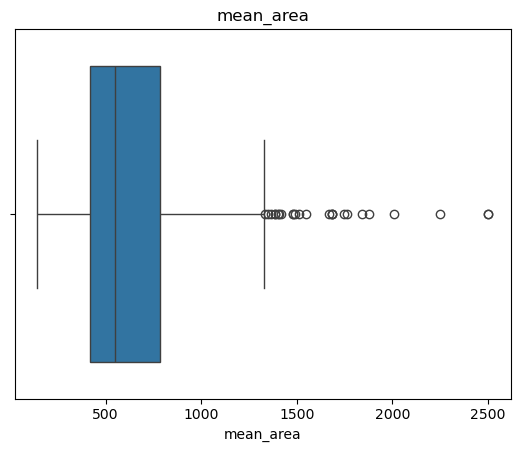

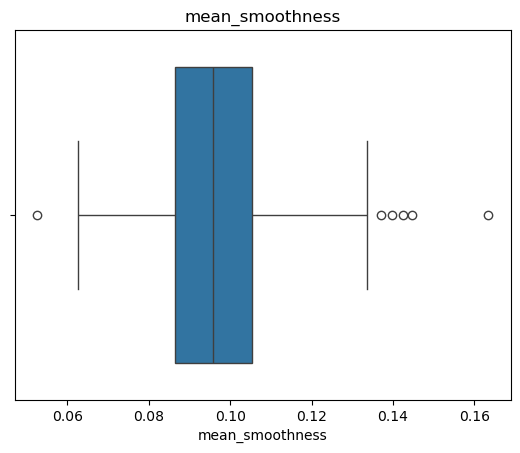

In [22]:
for i in x.columns:
    sns.boxplot(data = x, x = i)
    plt.title(f'{i}')
    plt.show()

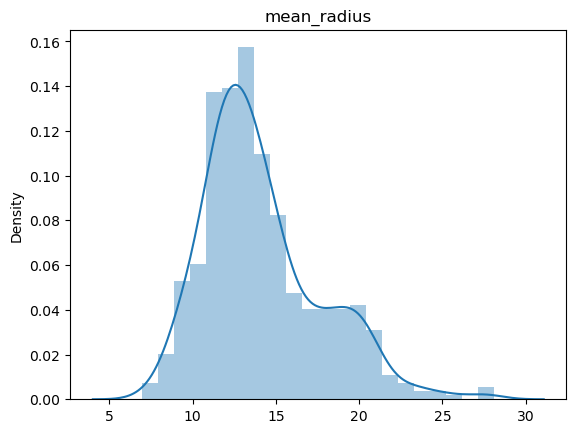

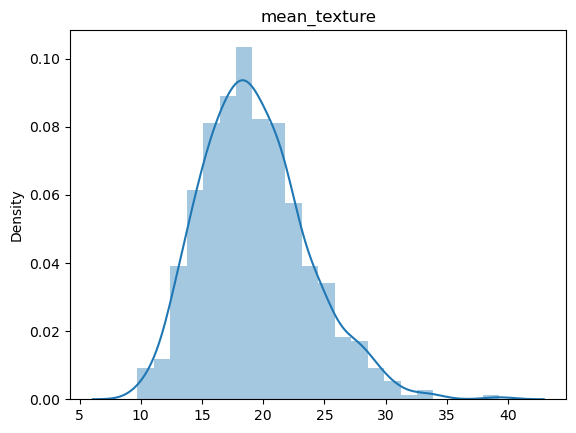

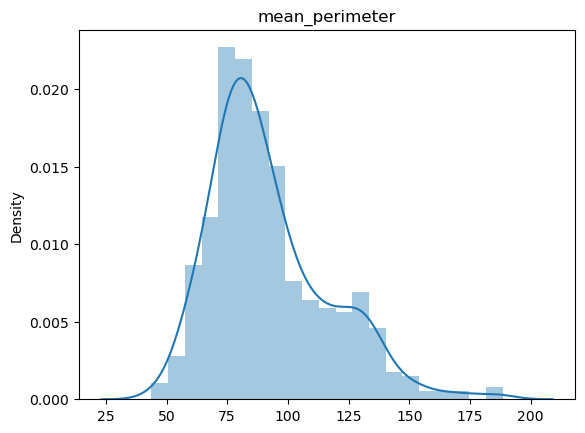

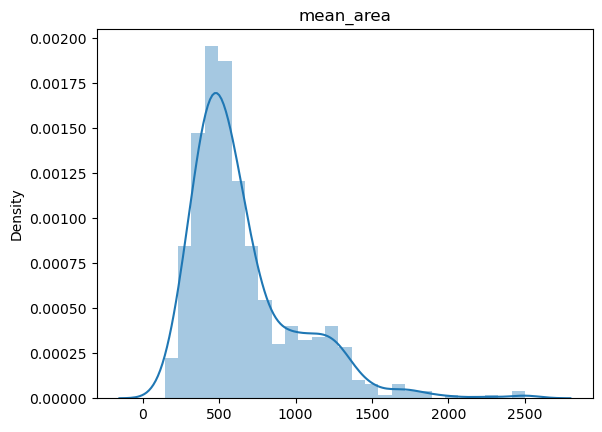

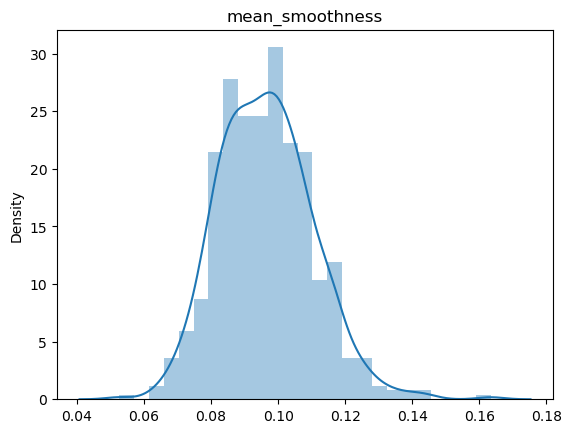

In [23]:
for i in x.columns:
    sns.distplot(x[[f'{i}']])
    plt.title(f'{i}')
    plt.show()

# Detection of Outliers and Removing them

### checking outliers for all the columns 

#### check the distribution, if it show skewness then use iqr method 

In [34]:
# x.mean_texture.describe()

In [24]:
x.describe()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness
count,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360
std,3.524049,4.301036,24.298981,351.914129,0.014064
min,6.981000,9.710000,43.790000,143.500000,0.052630
25%,11.700000,16.170000,75.170000,420.300000,0.086370
50%,13.370000,18.840000,86.240000,551.100000,0.095870
75%,15.780000,21.800000,104.100000,782.700000,0.105300
max,28.110000,39.280000,188.500000,2501.000000,0.163400


In [36]:
# manual and timing taking 

# upper=x.mean_texture.quantile(.75)
# lower=x.mean_texture.quantile(.25)

In [61]:
# iqr_radius = upper - lower
# iqr_radius

In [62]:
# upper_limit = upper + 1.5 * iqr_radius
# lower_limit = lower - 1.5 * iqr_radius
# print(upper_limit)
# print(lower_limit)

In [63]:
# ndf = x[(x.mean_texture > upper_limit) | (x.mean_texture < lower_limit)]
# ndf

In [254]:
# x.mean_texture = np.where(
#     x.mean_texture > upper_limit, upper_limit,
#     np.where(x.mean_texture < lower_limit, lower_limit,
#             x.mean_texture)


In [25]:
# shortcut to remove outliers from all columns at onces
for i in x.columns:
    def iqr(s):
        upper=x[s].quantile(.75)
        lower=x[s].quantile(.25)
        iqr_radius = upper - lower
        upper_limit = upper + 1.5 * iqr_radius
        lower_limit = lower - 1.5 * iqr_radius
        print(f'The outliers of {s}:\n')
        dd = x[(x[s] > upper_limit) | (x[s] < lower_limit)]
        
        x[s] = np.where(
        x[s] > upper_limit, upper_limit,
        np.where(x[s] < lower_limit, lower_limit,
                x[s]))
        return dd
    print(iqr(f'{i}')) 

The outliers of mean_radius:

     mean_radius  mean_texture  mean_perimeter  mean_area  mean_smoothness
82         25.22         24.91           171.5     1878.0          0.10630
108        22.27         19.67           152.8     1509.0          0.13260
122        24.25         20.20           166.2     1761.0          0.14470
164        23.27         22.04           152.1     1686.0          0.08439
180        27.22         21.87           182.1     2250.0          0.10940
202        23.29         26.67           158.9     1685.0          0.11410
212        28.11         18.47           188.5     2499.0          0.11420
236        23.21         26.97           153.5     1670.0          0.09509
339        23.51         24.27           155.1     1747.0          0.10690
352        25.73         17.46           174.2     2010.0          0.11490
369        22.01         21.90           147.2     1482.0          0.10630
461        27.42         26.27           186.9     2501.0          0.1

# After removing outliers

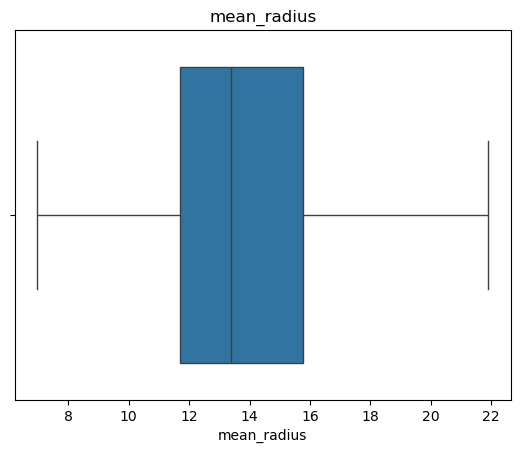

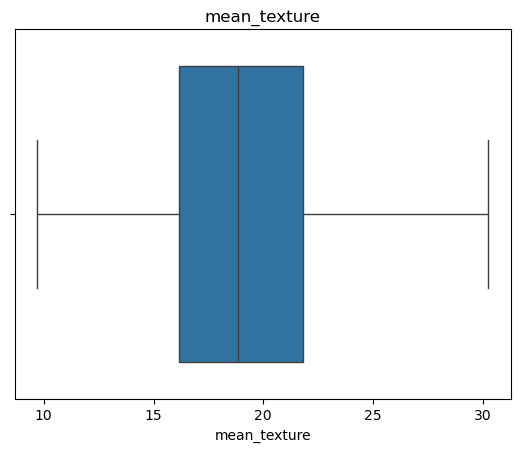

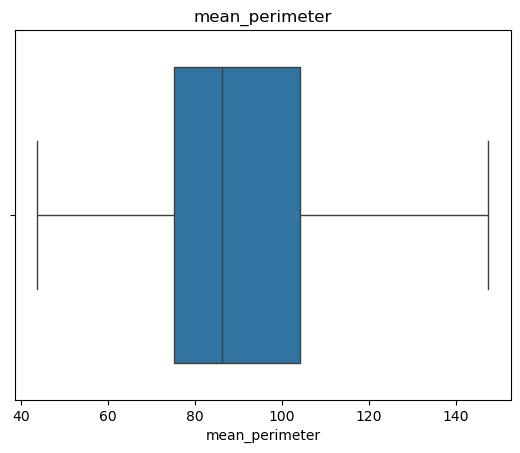

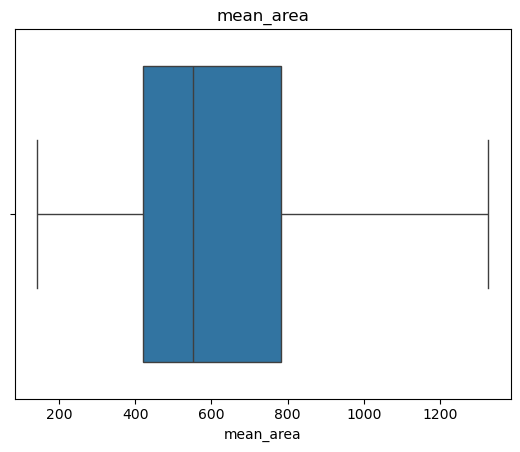

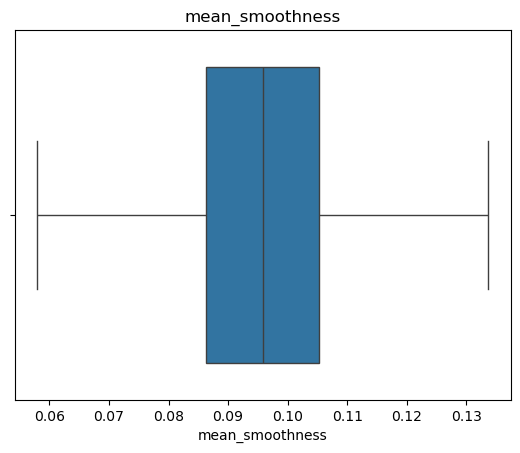

In [26]:
for i in x.columns:
    sns.boxplot(data = x, x = i)
    plt.title(f'{i}')
    plt.show()

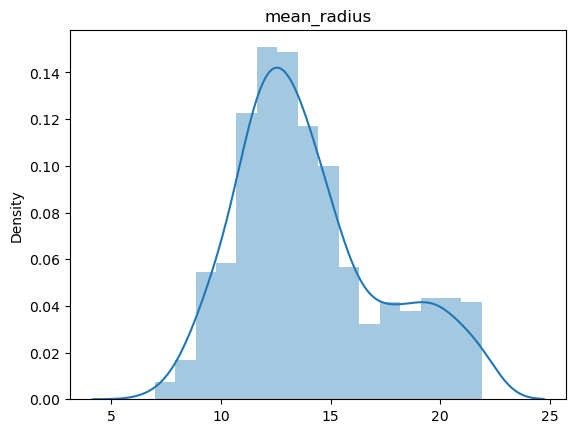

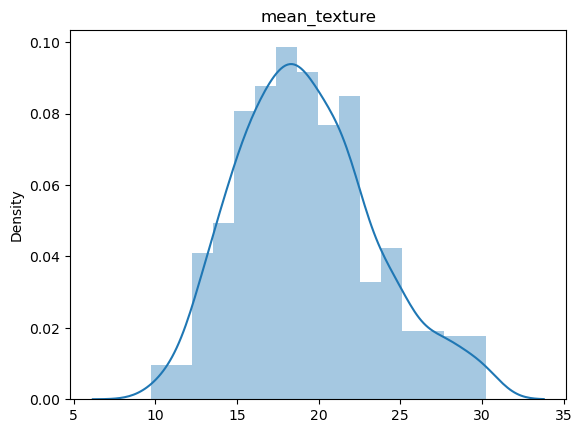

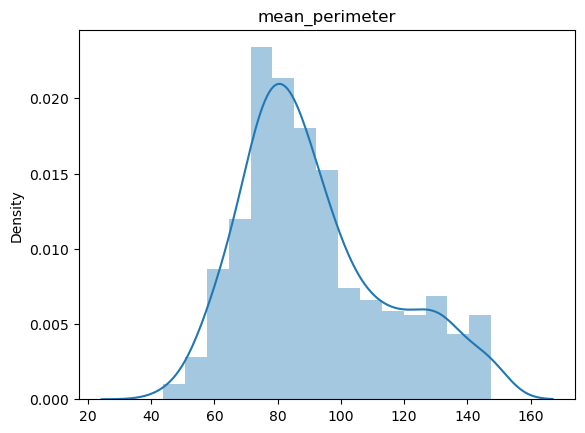

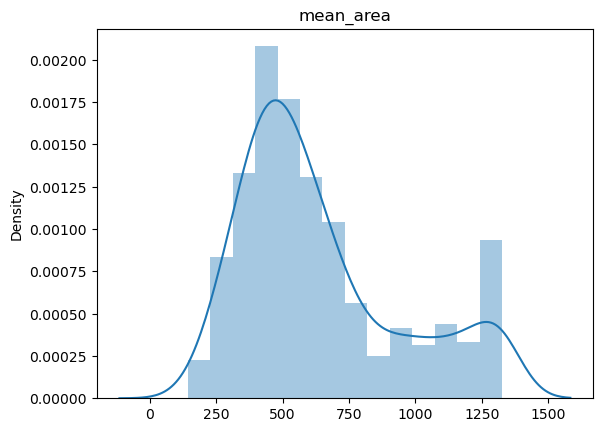

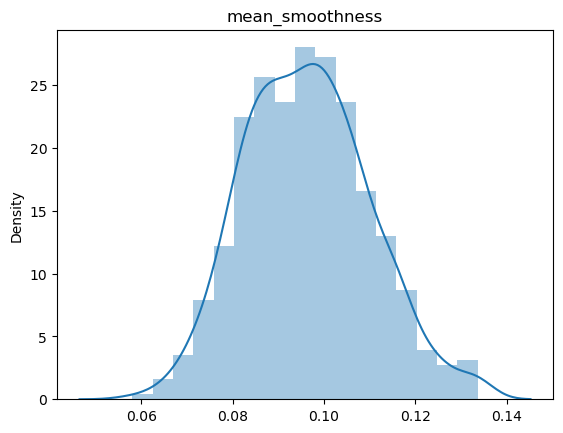

In [27]:
for i in x.columns:
    sns.distplot(x[[f'{i}']])
    plt.title(f'{i}')
    plt.show()

#  Scaling

### minmax scaling

In [28]:
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()
x = mm.fit_transform(x)
x = pd.DataFrame(x,columns=xx.columns)
x

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness
0,0.737918,0.032627,0.761873,0.724975,0.798006
1,0.910852,0.392501,0.859264,0.999746,0.353473
2,0.851867,0.561967,0.831300,0.895756,0.681788
3,0.297540,0.519601,0.325828,0.205107,1.000000
4,0.892084,0.225469,0.880478,0.975228,0.558967
...,...,...,...,...,...
564,0.977210,0.617482,0.947013,1.000000,0.700277
565,0.881359,0.902849,0.842872,0.944792,0.525951
566,0.644748,0.894570,0.622053,0.604160,0.350964
567,0.912863,0.955442,0.928692,0.948174,0.790082


In [39]:
x.describe()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness
count,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.474691,0.464803,0.460477,0.419568,0.505691
std,0.223877,0.203921,0.222238,0.258153,0.180727
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.316308,0.314585,0.302589,0.234021,0.375000
50%,0.428246,0.444607,0.409334,0.344606,0.500462
75%,0.589785,0.588751,0.581553,0.540413,0.625000
max,1.000000,1.000000,1.000000,1.000000,1.000000


#  traintestsplit

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
x_train,X_test,y_train,Y_test = train_test_split(x,y,test_size=0.2)

In [32]:
print(x_train.shape)
print(X_test.shape)
print(y_train.shape)
print(Y_test.shape)

(455, 5)
(114, 5)
(455, 1)
(114, 1)


In [33]:
x_train.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness
366,0.886051,0.833699,0.866978,0.921965,0.542459
80,0.299551,0.548332,0.289475,0.218126,0.689712
22,0.560292,0.221573,0.566125,0.474214,0.651413
70,0.801595,0.564889,0.769587,0.834038,0.424128
395,0.474496,0.363769,0.443180,0.393642,0.296817


In [34]:
X_test.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness
420,0.307594,0.454346,0.293236,0.225059,0.362982
44,0.414840,0.589238,0.401427,0.328035,0.517235
496,0.379985,0.411980,0.375102,0.289229,0.655375
399,0.323011,0.367665,0.303457,0.243828,0.434429
88,0.360547,0.588751,0.347042,0.272743,0.392829


In [35]:
y_train.head()

,diagnosis
366,0
80,1
22,0
70,0
395,1


In [36]:
Y_test.head()

,diagnosis
420,1
44,0
496,1
399,1
88,1


In [37]:
c = x.corr()
c

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness
mean_radius,1.000000,0.332760,0.997692,0.993891,0.167672
mean_texture,0.332760,1.000000,0.339588,0.341552,-0.015997
mean_perimeter,0.997692,0.339588,1.000000,0.991861,0.204990
mean_area,0.993891,0.341552,0.991861,1.000000,0.167400
mean_smoothness,0.167672,-0.015997,0.204990,0.167400,1.000000


<Axes: >

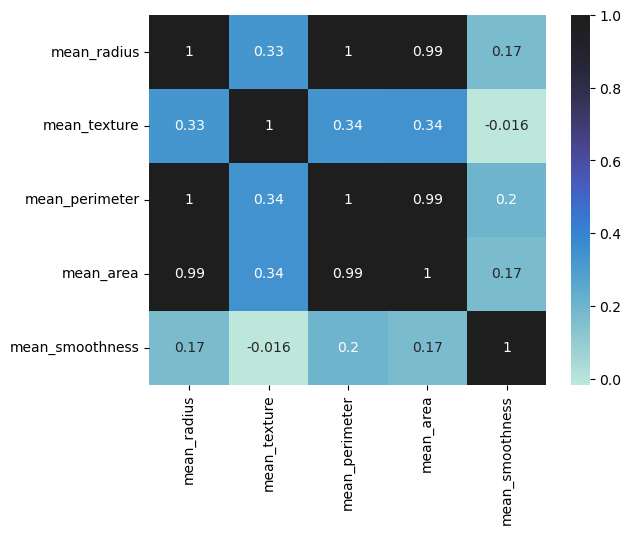

In [38]:
sns.heatmap(c, annot = True, center = True)